<a href="https://colab.research.google.com/github/XuRui314/MathematicalModeling/blob/main/Modern_Optimization_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 现代优化算法

这部分主要就是介绍主流的智能算法，也就是随机搜索算法，是gradient-free的，这种算法的介绍以及和梯度下降的区别可以看这里：
- https://www.zhihu.com/question/38902378/answer/1761994807
- https://www.zhihu.com/question/38902378/answer/318206733



所有的群体算法归根究柢就是两个模块：**强化搜索模块**（intensification）和**扩散模块**（diversification）。无论你怎么设计，这要针对这两个点就可以了。如果是做离散优化，只需要了解基础的Genetic和Memetic就可以了。启发式算法的水很深，想做的好非常难。更多的精力需要放在：如何更有效率的进行intensification搜索（local search等），利用一些特殊的数据结构来降低评估复杂度；如何设计有效的交叉算符crossover，既保留父代优质解的优秀属性，同样进行有方向性的发散；如何设计高效的种群管理机制，在保证整个种群高质量的同时，兼顾种群熵 (Entropy)，保护多样性。
总结就是如何保证搜索的多样性和搜索的有效性，毕竟是利用采样的点，通过设计的定性规则来朝着最优解靠近。

学习这些算法可以看这系列的文章：[智能算法](https://mp.weixin.qq.com/mp/appmsgalbum?__biz=MzI4ODgwMjYyNQ==&action=getalbum&album_id=2151757310631739396#wechat_redirect)

实际使用的时候肯定还是调库，这里选择的是`scikit-opt`这个开源库，可以参考官方文档以及下面的资料：
https://blog.51cto.com/u_15326986/5293868

In [2]:
pip install scikit-opt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt

num_points = 50

points_coordinate = np.random.rand(num_points, 2)  # generate coordinate of points
distance_matrix = spatial.distance.cdist(points_coordinate, points_coordinate, metric='euclidean')


def cal_total_distance(routine):
    '''The objective function. input routine, return total distance.
    cal_total_distance(np.arange(num_points))
    '''
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])

In [50]:
from sko.GA import GA_TSP

ga_tsp = GA_TSP(func=cal_total_distance, n_dim=num_points, size_pop=50, max_iter=10000, prob_mut=1)
best_points, best_distance = ga_tsp.run()


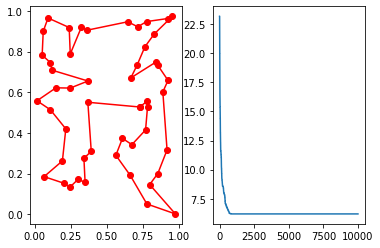

In [51]:
fig, ax = plt.subplots(1, 2)
best_points_ = np.concatenate([best_points, [best_points[0]]])
best_points_coordinate = points_coordinate[best_points_, :]
ax[0].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1], 'o-r')
ax[1].plot(ga_tsp.generation_best_Y)
plt.show()

In [19]:
def demo_func(x):
    x1, x2, x3 = x
    return x1 ** 2 + (x2 - 0.05) ** 2 + x3 ** 2

In [20]:
from sko.PSO import PSO

pso = PSO(func=demo_func, dim=3, pop=40, max_iter=150, lb=[0, -1, 0.5], ub=[1, 1, 1], w=0.8, c1=0.5, c2=0.5)
pso.run()
print('best_x is ', pso.gbest_x, 'best_y is', pso.gbest_y)

best_x is  [0.   0.05 0.5 ] best_y is [0.25]


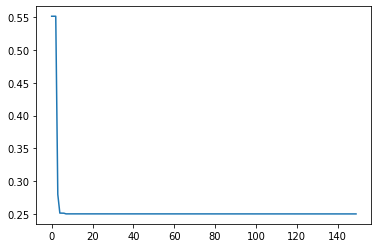

In [21]:
import matplotlib.pyplot as plt

plt.plot(pso.gbest_y_hist)
plt.show()

In [22]:
demo_func = lambda x: x[0] ** 2 + (x[1] - 0.05) ** 2 + x[2] ** 2

In [23]:
from sko.SA import SA

sa = SA(func=demo_func, x0=[1, 1, 1], T_max=1, T_min=1e-9, L=300, max_stay_counter=150)
best_x, best_y = sa.run()
print('best_x:', best_x, 'best_y', best_y)

best_x: [-1.21024110e-06  4.99871688e-02 -8.85312861e-06] best_y 2.444810054106178e-10


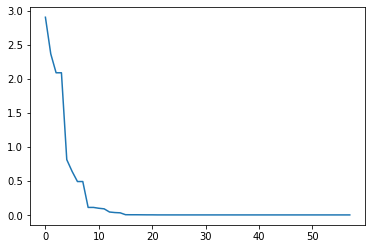

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

plt.plot(pd.DataFrame(sa.best_y_history).cummin(axis=0))
plt.show()

In [64]:
from sko.SA import SA_TSP

sa_tsp = SA_TSP(func=cal_total_distance, x0=range(num_points), T_max=100, T_min=1, L=10 * num_points)

best_points, best_distance = sa_tsp.run()
print(best_points, best_distance, cal_total_distance(best_points))

[15 12 25  1  3 29  9  2  8 43 24  5 38  0 49 23 41 27 45 13 20 21 47 44
 10 28 14 39 33 19 36 40 35  7 48  6 30 34 46 32 37  4 42 18 31 16 22 26
 11 17] 20.38321538866535 20.38321538866535


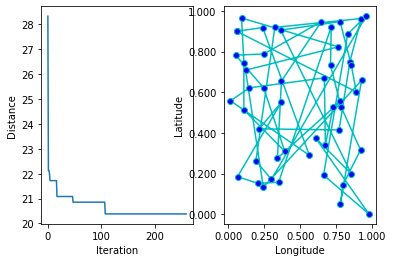

In [65]:
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots(1, 2)

best_points_ = np.concatenate([best_points, [best_points[0]]])
best_points_coordinate = points_coordinate[best_points_, :]
ax[0].plot(sa_tsp.best_y_history)
ax[0].set_xlabel("Iteration")
ax[0].set_ylabel("Distance")
ax[1].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1],
           marker='o', markerfacecolor='b', color='c', linestyle='-')
ax[1].xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax[1].set_xlabel("Longitude")
ax[1].set_ylabel("Latitude")
plt.show()

In [31]:
def func(x):
    x1, x2 = x
    return 1 / x1 ** 2 + x1 ** 2 + 1 / x2 ** 2 + x2 ** 2


from sko.AFSA import AFSA

afsa = AFSA(func, n_dim=2, size_pop=50, max_iter=300,
            max_try_num=100, step=0.5, visual=0.3,
            q=0.98, delta=0.5)
best_x, best_y = afsa.run()
print(best_x, best_y)

[1.00000245 0.99998915] 4.00000000049466
